In [123]:
import seaborn as sns
import numpy as np
from seaborn import load_dataset
import matplotlib.pyplot as plt
from scipy.stats import norm,uniform

In [124]:
data = load_dataset('iris')

In [125]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


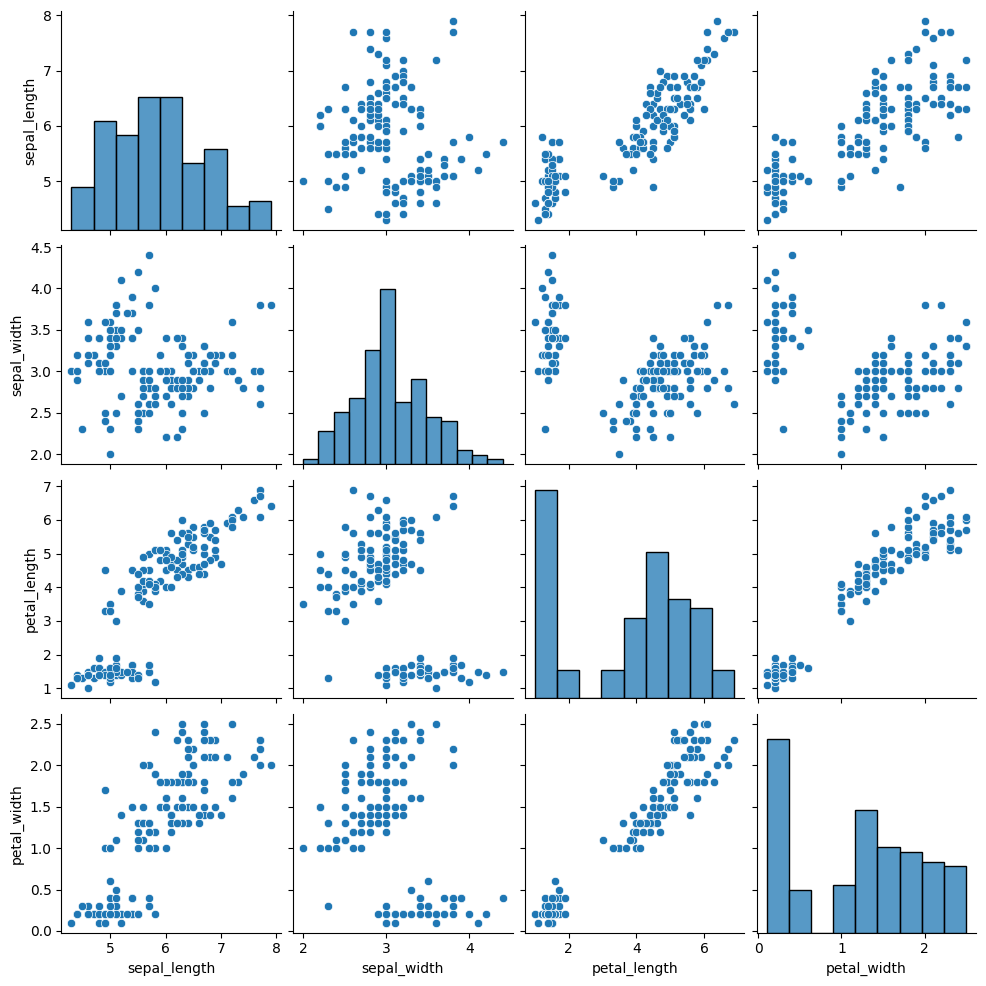

In [126]:
sns.pairplot(data)

<Axes: xlabel='sepal_length', ylabel='Count'>

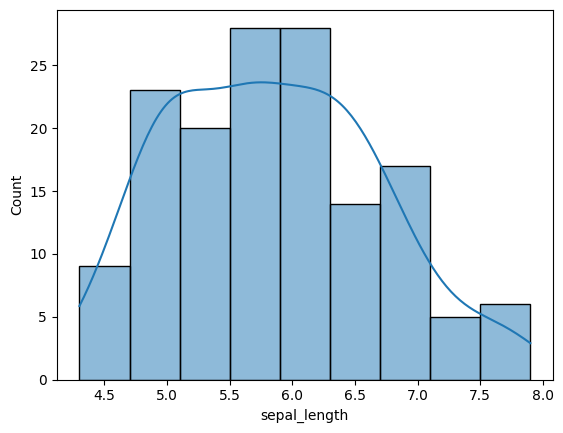

In [127]:
sns.histplot(x = data['sepal_length'], kde =True)

## Finding kernel estimator to get probability density using KDE PLOT

<Axes: xlabel='sepal_length', ylabel='Density'>

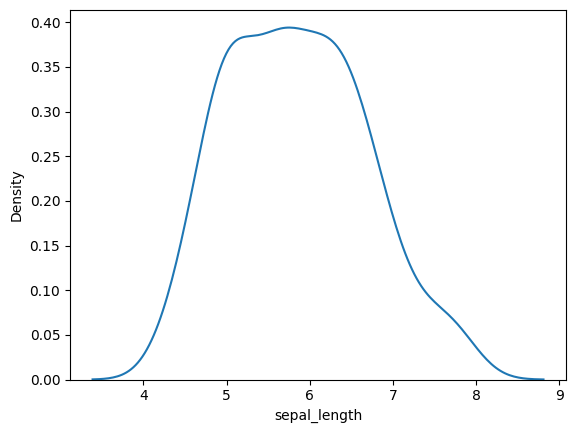

In [128]:
sns.kdeplot(x= data['sepal_length'])

## If we know that the distribution follows normal then to find density we can

In [129]:
mu, sigma = norm.fit(data['sepal_length'])
print(mu)
print(sigma)


5.843333333333334
0.8253012917851409


In [130]:
print(data['sepal_length'].mean())
print(data['sepal_length'].std())

5.843333333333334
0.828066127977863


In [131]:
x = np.linspace(data['sepal_length'].min(),data['sepal_length'].max(), 1000)
print(x.shape)
pdf = norm.pdf(x,mu,sigma)

(1000,)


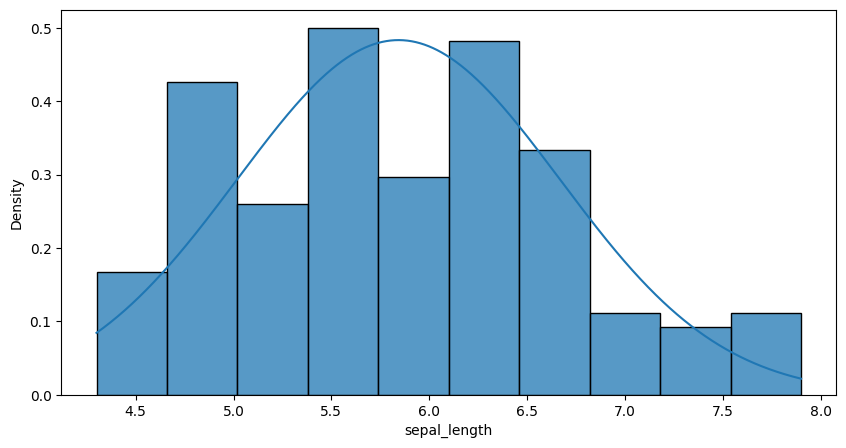

In [132]:
plt.figure(figsize = (10,5))
sns.histplot(data['sepal_length'],bins = 10, kde = False, label = 'sepal_length distribution',stat='density')
plt.plot(x, pdf, label = 'Normal density')

## now doing the same with non parametric approach

<Axes: xlabel='sepal_length', ylabel='Density'>

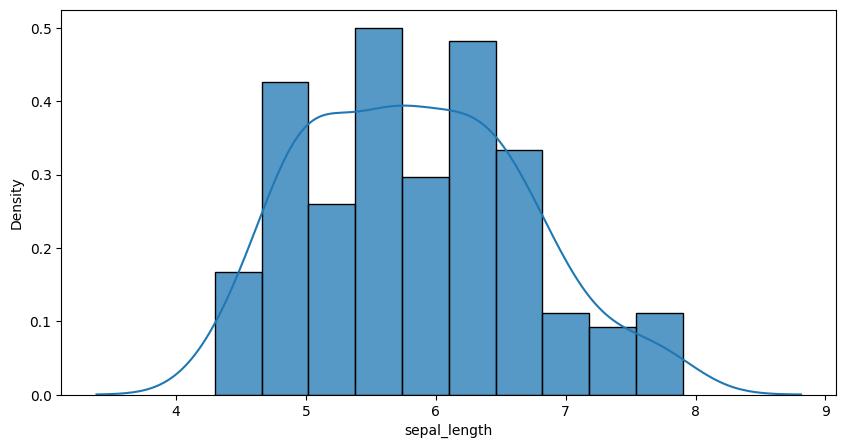

In [133]:
plt.figure(figsize = (10,5))
sns.histplot(data['sepal_length'],bins = 10, kde = False, label = 'sepal_length distribution',stat='density')
sns.kdeplot(x= data['sepal_length'])

In [138]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Select a feature (e.g., sepal_length)
feature = "sepal_length"
data = iris[feature]

# Estimate the parameters of the normal distribution
mean = np.mean(data)
std = np.std(data)

# Define a range of x values for evaluation
x_values = np.linspace(data.min(), data.max(), 100)

# Compute the PDF using the normal distribution
pdf_values = norm.pdf(x_values, loc=mean, scale=std)


# Optionally, plot the PDF for reference
plt.figure(figsize=(8, 6))
sns.histplot(x = feature,bins = 10, kde = False, label = 'sepal_length distribution')
plt.plot(x_values, pdf_values, label="Parametric PDF (Normal)", color="red")
plt.title(f"Parametric PDF for {feature} (Normal Distribution)")
plt.xlabel(feature)
plt.ylabel("Density")
plt.legend()
plt.show()

ValueError: Could not interpret value `sepal_length` for `x`. Value is a string, but `data` was not passed.

<Figure size 800x600 with 0 Axes>

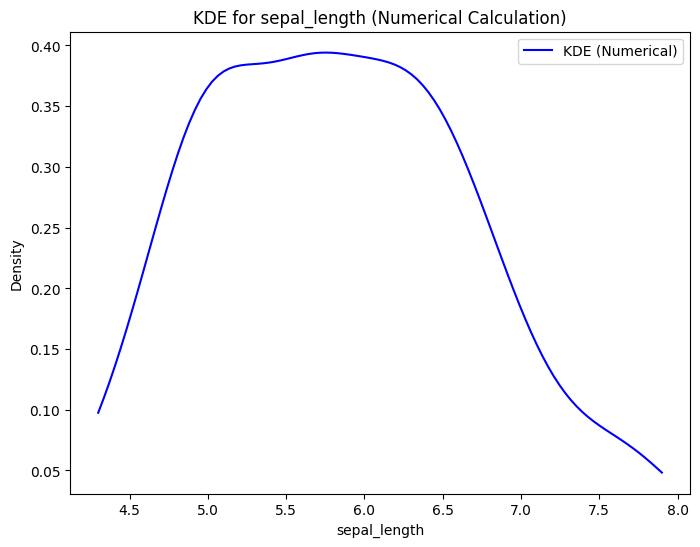

In [145]:
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Select a feature (e.g., sepal_length)
feature = "sepal_length"
data = iris[feature]

# Calculate the kernel density estimate
kde = gaussian_kde(data)
x_values = np.linspace(data.min(), data.max(), 100)  # Define a range for evaluation
pdf_values = kde(x_values)


# Optionally, plot the PDF for reference
plt.figure(figsize=(8, 6))
plt.plot(x_values, pdf_values, label="KDE (Numerical)", color="blue")
plt.title(f"KDE for {feature} (Numerical Calculation)")
plt.xlabel(feature)
plt.ylabel("Density")
plt.legend()
plt.show()